In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [138]:
df.describe()
df.isna()/len(df)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Standardization,Pregnacies,Pregnant,AgeGroup
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


No missing values

In [10]:
df.Outcome.value_counts() / len(df)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [11]:
# not avery well balanced dataset, but we can make do

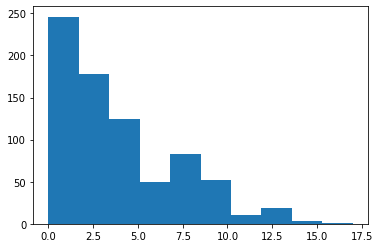

In [14]:
plt.hist(df["Pregnancies"])
plt.show()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


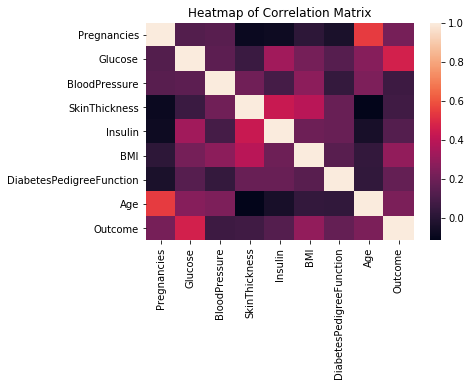

In [17]:
# Create a correlation matrix. What features correlate the most with turnover? What other correlations did you find?
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix')
corr

Text(0.5, 1.0, 'Outcome Distribution - Yes V.S. No')

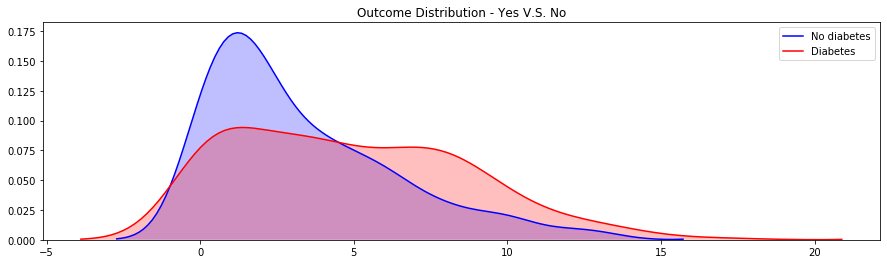

In [19]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Outcome'] == 0),'Pregnancies'] , color='b',shade=True, label='No diabetes')
ax=sns.kdeplot(df.loc[(df['Outcome'] == 1),'Pregnancies'] , color='r',shade=True, label='Diabetes')
plt.title('Outcome Distribution - Yes V.S. No')

Text(0.5, 1.0, 'Outcome Distribution - Yes V.S. No')

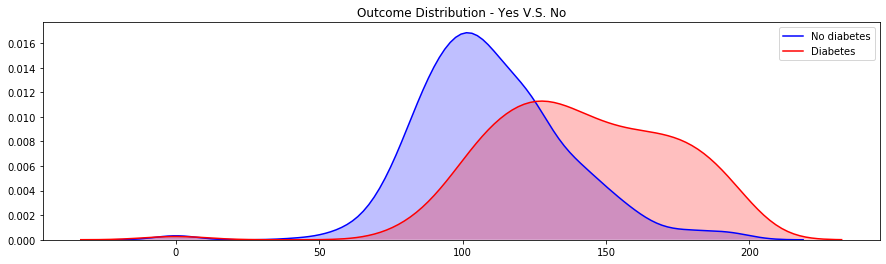

In [29]:
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Outcome'] == 0),'Glucose'] , color='b',shade=True, label='No diabetes')
ax=sns.kdeplot(df.loc[(df['Outcome'] == 1),'Glucose'] , color='r',shade=True, label='Diabetes')
plt.title('Outcome Distribution - Yes V.S. No')

Text(0.5, 1.0, 'Outcome Distribution - Yes V.S. No')

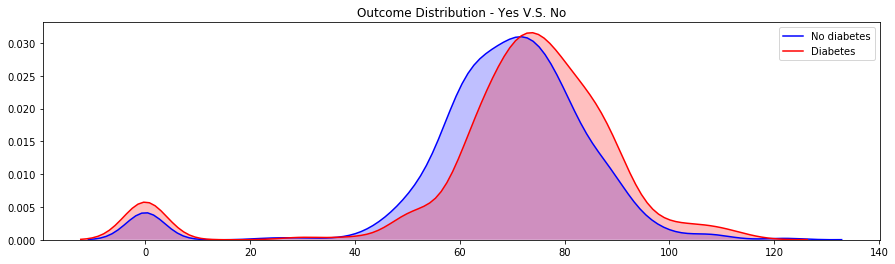

In [31]:
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Outcome'] == 0),'BloodPressure'] , color='b',shade=True, label='No diabetes')
ax=sns.kdeplot(df.loc[(df['Outcome'] == 1),'BloodPressure'] , color='r',shade=True, label='Diabetes')
plt.title('Outcome Distribution - Yes V.S. No')

Text(0.5, 1.0, 'Outcome Distribution - Yes V.S. No')

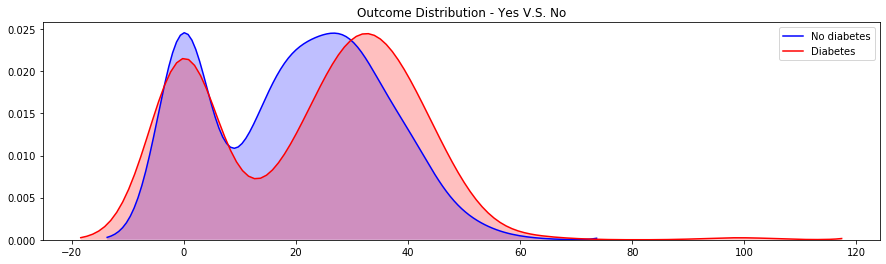

In [32]:
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Outcome'] == 0),'SkinThickness'] , color='b',shade=True, label='No diabetes')
ax=sns.kdeplot(df.loc[(df['Outcome'] == 1),'SkinThickness'] , color='r',shade=True, label='Diabetes')
plt.title('Outcome Distribution - Yes V.S. No')

Text(0.5, 1.0, 'Outcome Distribution - Yes V.S. No')

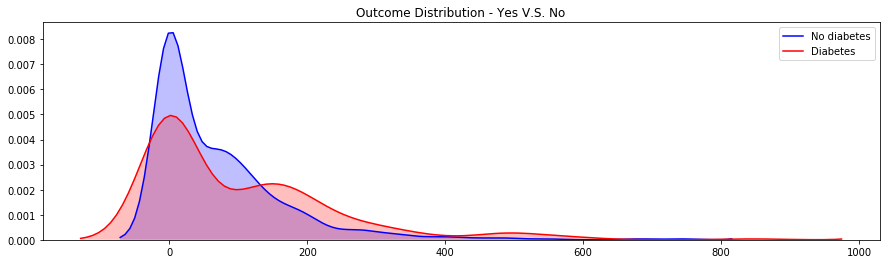

In [33]:
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Outcome'] == 0),'Insulin'] , color='b',shade=True, label='No diabetes')
ax=sns.kdeplot(df.loc[(df['Outcome'] == 1),'Insulin'] , color='r',shade=True, label='Diabetes')
plt.title('Outcome Distribution - Yes V.S. No')

Text(0.5, 1.0, 'Outcome Distribution - Yes V.S. No')

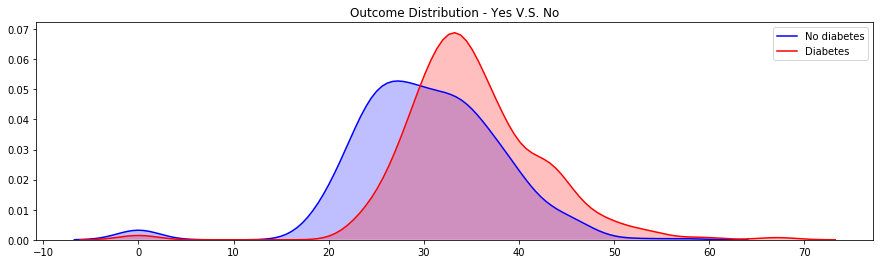

In [34]:
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Outcome'] == 0),'BMI'] , color='b',shade=True, label='No diabetes')
ax=sns.kdeplot(df.loc[(df['Outcome'] == 1),'BMI'] , color='r',shade=True, label='Diabetes')
plt.title('Outcome Distribution - Yes V.S. No')

Text(0.5, 1.0, 'Outcome Distribution - Yes V.S. No')

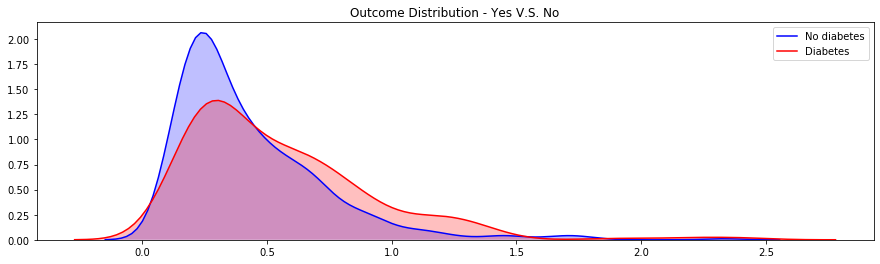

In [36]:
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Outcome'] == 0),'DiabetesPedigreeFunction'] , color='b',shade=True, label='No diabetes')
ax=sns.kdeplot(df.loc[(df['Outcome'] == 1),'DiabetesPedigreeFunction'] , color='r',shade=True, label='Diabetes')
plt.title('Outcome Distribution - Yes V.S. No')

Text(0.5, 1.0, 'Outcome Distribution - Yes V.S. No')

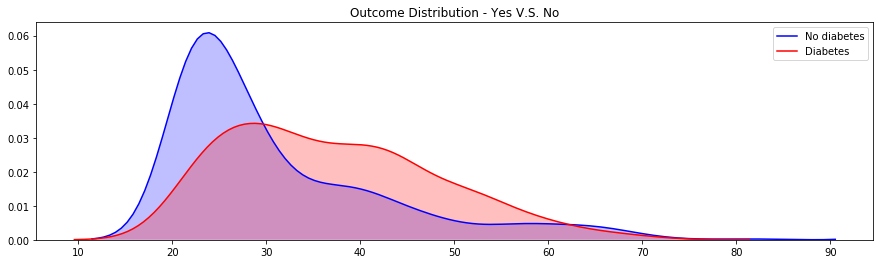

In [37]:
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Outcome'] == 0),'Age'] , color='b',shade=True, label='No diabetes')
ax=sns.kdeplot(df.loc[(df['Outcome'] == 1),'Age'] , color='r',shade=True, label='Diabetes')
plt.title('Outcome Distribution - Yes V.S. No')

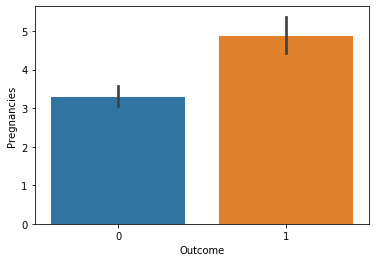

In [47]:
ax = sns.barplot(x="Outcome", y="Pregnancies", data=df)

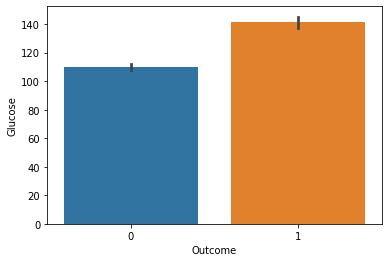

In [48]:
ax = sns.barplot(x="Outcome", y="Glucose", data=df)

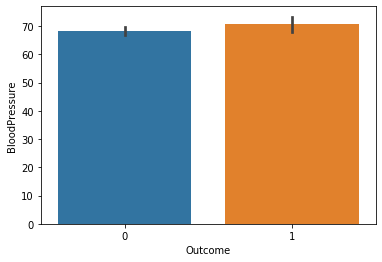

In [49]:
ax = sns.barplot(x="Outcome", y="BloodPressure", data=df)

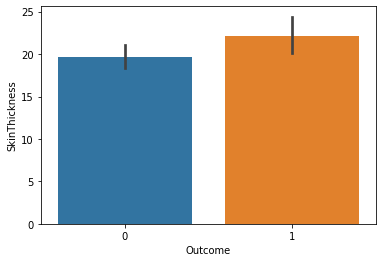

In [50]:
ax = sns.barplot(x="Outcome", y="SkinThickness", data=df)

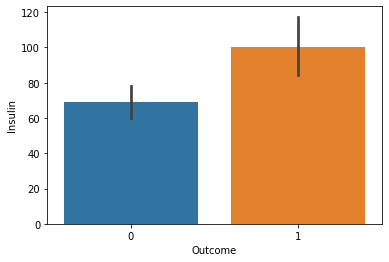

In [51]:
ax = sns.barplot(x="Outcome", y="Insulin", data=df)

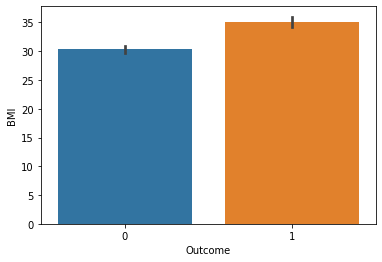

In [52]:
ax = sns.barplot(x="Outcome", y="BMI", data=df)

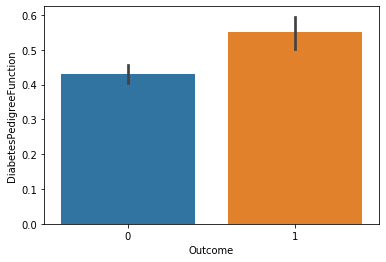

In [54]:
ax = sns.barplot(x="Outcome", y="DiabetesPedigreeFunction", data=df)

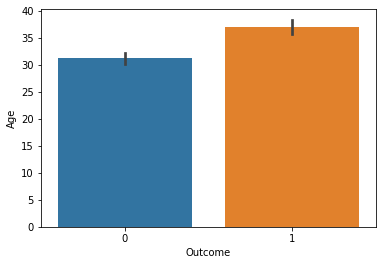

In [55]:
ax = sns.barplot(x="Outcome", y="Age", data=df)

In [56]:
# Fixed Width Binning (Kid, Teen, Adult, Elderly)
#bins = [0,12,17,60,150]
#labels = ["kid","teen","adult","elderly"]
#train['AgeGroup'] = pd.cut(train.Age,bins=bins,labels=labels)
#train[['Age','AgeGroup']].head(10)

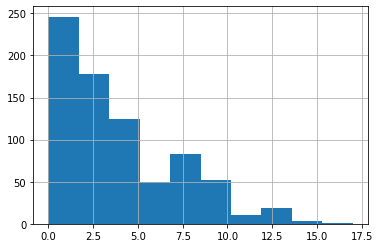

In [64]:
df.Pregnancies.hist()

In [88]:
df.Pregnancies.value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [91]:
df.Pregnacies.describe()

count    768.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: Pregnacies, dtype: float64

In [92]:
not_preg_no_diab=df.loc[(df['Pregnancies'] < 1) & (df['Outcome'] == 0)]
  

In [93]:
print(not_preg_no_diab)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
57             0      100             88             60      110  46.8   
58             0      146             82              0        0  40.5   
59             0      105             64             41      142  41.5   
83             0      101             65             28        0  24.6   
102            0      125             96              0        0  22.5   
..           ...      ...            ...            ...      ...   ...   
682            0       95             64             39      105  44.6   
697            0       99              0              0        0  25.0   
713            0      134             58             20      291  26.4   
727            0      141             84             26        0  32.4   
736            0      126             86             27      120  27.4   

     DiabetesPedigreeFunction  Age  Outcome  Standardization  Pregnacies  
57                      0.962   31  

In [94]:
not_preg=df.loc[df['Pregnancies'] < 1]

In [95]:
print(not_preg)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
4              0      137             40             35      168  43.1   
16             0      118             84             47      230  45.8   
45             0      180             66             39        0  42.0   
57             0      100             88             60      110  46.8   
58             0      146             82              0        0  40.5   
..           ...      ...            ...            ...      ...   ...   
713            0      134             58             20      291  26.4   
727            0      141             84             26        0  32.4   
736            0      126             86             27      120  27.4   
753            0      181             88             44      510  43.3   
757            0      123             72              0        0  36.3   

     DiabetesPedigreeFunction  Age  Outcome  Standardization  Pregnacies  
4                       2.288   33  

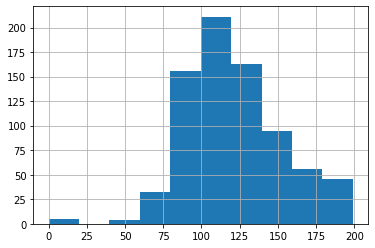

In [66]:
df.Glucose.hist()

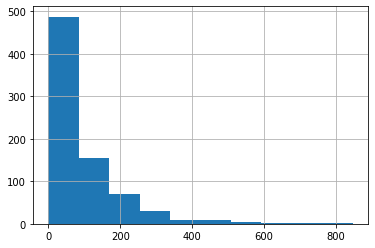

In [67]:
df.Insulin.hist()

In [70]:
import sklearn.preprocessing as preproc
df['Standardization'] = preproc.StandardScaler().fit_transform(df[['Insulin']])

In [71]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Standardization
0,6,148,72,35,0,33.6,0.627,50,1,-0.692891
1,1,85,66,29,0,26.6,0.351,31,0,-0.692891
2,8,183,64,0,0,23.3,0.672,32,1,-0.692891
3,1,89,66,23,94,28.1,0.167,21,0,0.123302
4,0,137,40,35,168,43.1,2.288,33,1,0.765836


In [96]:
def Pregnant(df):
    if df['Pregnancies'] < 1:
        return 'Not Pregnant'
    else:
        return 'Pregnant'

In [98]:

df['Pregnant'] = df.apply(Pregnant, axis=1)

df.Pregnant.value_counts()

Pregnant        657
Not Pregnant    111
Name: Pregnant, dtype: int64

In [101]:
# Fixed Width Binning (Kid, Teen, Adult, Elderly)
bins = [20,40,60,80]
labels = ["young","adult","senior"]
df['AgeGroup'] = pd.cut(df.Age,bins=bins,labels=labels)
df[['Age','AgeGroup']].head(10)

,Age,AgeGroup
0,50,adult
1,31,young
2,32,young
3,21,young
4,33,young
5,30,young
6,26,young
7,29,young
8,53,adult
9,54,adult


In [102]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Standardization,Pregnacies,Pregnant,AgeGroup
0,6,148,72,35,0,33.6,0.627,50,1,-0.692891,0,Pregnant,adult
1,1,85,66,29,0,26.6,0.351,31,0,-0.692891,0,Pregnant,young
2,8,183,64,0,0,23.3,0.672,32,1,-0.692891,0,Pregnant,young
3,1,89,66,23,94,28.1,0.167,21,0,0.123302,0,Pregnant,young
4,0,137,40,35,168,43.1,2.288,33,1,0.765836,0,Not Pregnant,young


In [139]:
df_newest = df.drop(columns =["Pregnacies"],axis =1)

In [140]:
df_newest.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Standardization,Pregnant,AgeGroup
0,6,148,72,35,0,33.6,0.627,50,1,-0.692891,Pregnant,adult
1,1,85,66,29,0,26.6,0.351,31,0,-0.692891,Pregnant,young
2,8,183,64,0,0,23.3,0.672,32,1,-0.692891,Pregnant,young
3,1,89,66,23,94,28.1,0.167,21,0,0.123302,Pregnant,young
4,0,137,40,35,168,43.1,2.288,33,1,0.765836,Not Pregnant,young


In [141]:
df_newest = df_newest.drop(columns =["Age"],axis =1)

In [142]:
df_newest.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome,Standardization,Pregnant,AgeGroup
0,6,148,72,35,0,33.6,0.627,1,-0.692891,Pregnant,adult
1,1,85,66,29,0,26.6,0.351,0,-0.692891,Pregnant,young
2,8,183,64,0,0,23.3,0.672,1,-0.692891,Pregnant,young
3,1,89,66,23,94,28.1,0.167,0,0.123302,Pregnant,young
4,0,137,40,35,168,43.1,2.288,1,0.765836,Not Pregnant,young


In [143]:
Age_dict = {'young' :1,'adult':2,'senior':3}
df_newest["Age_ord"] = df.AgeGroup.map(Age_dict)
df_newest.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome,Standardization,Pregnant,AgeGroup,Age_ord
0,6,148,72,35,0,33.6,0.627,1,-0.692891,Pregnant,adult,2
1,1,85,66,29,0,26.6,0.351,0,-0.692891,Pregnant,young,1
2,8,183,64,0,0,23.3,0.672,1,-0.692891,Pregnant,young,1
3,1,89,66,23,94,28.1,0.167,0,0.123302,Pregnant,young,1
4,0,137,40,35,168,43.1,2.288,1,0.765836,Not Pregnant,young,1


In [144]:
df_newest = df_newest.drop(columns =["AgeGroup"],axis=1)

In [145]:
df_newest.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome,Standardization,Pregnant,Age_ord
0,6,148,72,35,0,33.6,0.627,1,-0.692891,Pregnant,2
1,1,85,66,29,0,26.6,0.351,0,-0.692891,Pregnant,1
2,8,183,64,0,0,23.3,0.672,1,-0.692891,Pregnant,1
3,1,89,66,23,94,28.1,0.167,0,0.123302,Pregnant,1
4,0,137,40,35,168,43.1,2.288,1,0.765836,Not Pregnant,1


In [146]:
df_newest = pd.get_dummies(df_newest,prefix=["Preg"],columns =["Pregnant"])

In [147]:
df_newest.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome,Standardization,Age_ord,Preg_Not Pregnant,Preg_Pregnant
0,6,148,72,35,0,33.6,0.627,1,-0.692891,2,0,1
1,1,85,66,29,0,26.6,0.351,0,-0.692891,1,0,1
2,8,183,64,0,0,23.3,0.672,1,-0.692891,1,0,1
3,1,89,66,23,94,28.1,0.167,0,0.123302,1,0,1
4,0,137,40,35,168,43.1,2.288,1,0.765836,1,1,0


In [148]:
df_newest = df_newest.drop(columns=["Pregnancies"],axis =1)

In [149]:
df_newest.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome,Standardization,Age_ord,Preg_Not Pregnant,Preg_Pregnant
0,148,72,35,0,33.6,0.627,1,-0.692891,2,0,1
1,85,66,29,0,26.6,0.351,0,-0.692891,1,0,1
2,183,64,0,0,23.3,0.672,1,-0.692891,1,0,1
3,89,66,23,94,28.1,0.167,0,0.123302,1,0,1
4,137,40,35,168,43.1,2.288,1,0.765836,1,1,0


In [150]:
df_newest = df_newest.drop(columns =["Preg_Not Pregnant"],axis =1)

In [151]:
df_newest.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome,Standardization,Age_ord,Preg_Pregnant
0,148,72,35,0,33.6,0.627,1,-0.692891,2,1
1,85,66,29,0,26.6,0.351,0,-0.692891,1,1
2,183,64,0,0,23.3,0.672,1,-0.692891,1,1
3,89,66,23,94,28.1,0.167,0,0.123302,1,1
4,137,40,35,168,43.1,2.288,1,0.765836,1,0


In [152]:
df_newest = df_newest.reset_index()

In [153]:
df_newest.head()

,index,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome,Standardization,Age_ord,Preg_Pregnant
0,0,148,72,35,0,33.6,0.627,1,-0.692891,2,1
1,1,85,66,29,0,26.6,0.351,0,-0.692891,1,1
2,2,183,64,0,0,23.3,0.672,1,-0.692891,1,1
3,3,89,66,23,94,28.1,0.167,0,0.123302,1,1
4,4,137,40,35,168,43.1,2.288,1,0.765836,1,0


In [166]:

df_newest.head()
df_newest.info()
df_newest.isna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   index                     768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Outcome                   768 non-null    int64   
 8   Age_ord                   767 non-null    category
 9   Preg_Pregnant             768 non-null    uint8   
dtypes: category(1), float64(2), int64(6), uint8(1)
memory usage: 49.7 KB


,index,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome,Age_ord,Preg_Pregnant
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False,False


In [175]:
df_newest.Age_ord.value_counts()

1    574
2    167
3     26
Name: Age_ord, dtype: int64

In [177]:
df_newest['Age_ord'] = df_newest['Age_ord'].fillna(1)

In [178]:
df_newest.head()

,index,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome,Age_ord,Preg_Pregnant
0,0,148,72,35,0,33.6,0.627,1,2,1
1,1,85,66,29,0,26.6,0.351,0,1,1
2,2,183,64,0,0,23.3,0.672,1,1,1
3,3,89,66,23,94,28.1,0.167,0,1,1
4,4,137,40,35,168,43.1,2.288,1,1,0


In [179]:
df_newest.astype({'Age_ord': 'int32'}).dtypes

index                         int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Outcome                       int64
Age_ord                       int32
Preg_Pregnant                 uint8
dtype: object

In [180]:
X = df_newest.drop(columns=['Outcome'], axis=1)
y = df_newest['Outcome']

In [181]:
X.head()

,index,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age_ord,Preg_Pregnant
0,0,148,72,35,0,33.6,0.627,2,1
1,1,85,66,29,0,26.6,0.351,1,1
2,2,183,64,0,0,23.3,0.672,1,1
3,3,89,66,23,94,28.1,0.167,1,1
4,4,137,40,35,168,43.1,2.288,1,0


In [182]:
from sklearn import preprocessing
# standardize the data attributes
X_scaled = preprocessing.scale(X)

In [183]:
X_scaled

array([[-1.729797  ,  0.84832379,  0.14964075, ...,  0.46849198,
         1.37178429,  0.411035  ],
       [-1.72528645, -1.12339636, -0.16054575, ..., -0.36506078,
        -0.5472145 ,  0.411035  ],
       [-1.72077589,  1.94372388, -0.26394125, ...,  0.60439732,
        -0.5472145 ,  0.411035  ],
       ...,
       [ 1.72077589,  0.00330087,  0.14964075, ..., -0.68519336,
        -0.5472145 ,  0.411035  ],
       [ 1.72528645,  0.1597866 , -0.47073225, ..., -0.37110101,
         1.37178429,  0.411035  ],
       [ 1.729797  , -0.8730192 ,  0.04624525, ..., -0.47378505,
        -0.5472145 ,  0.411035  ]])

In [184]:
# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [185]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [187]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

In [190]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.69      0.88      0.77       151
           1       0.53      0.25      0.34        80

    accuracy                           0.66       231
   macro avg       0.61      0.57      0.56       231
weighted avg       0.63      0.66      0.62       231



In [191]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV

#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}

knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_scaled,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [192]:
knn_cv.best_score_

0.7409387997623291

In [193]:
knn_cv.best_params_

{'n_neighbors': 5}